**COMP3670/6670 Tutorial Week 10**
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Task 0: MNIST Dataset (Recap)

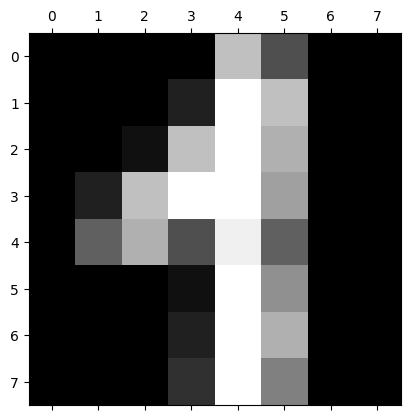

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
digits,labels = datasets.load_digits(return_X_y=True)
X = digits
y = labels

def print_heatmap(data, l=8, h=8):
    plt.matshow(data.reshape(l,h), cmap=plt.cm.gray)

print_heatmap(X[42]) #print digits


In [3]:
TEST_SIZE = 0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=TEST_SIZE)

print("Total dataset", np.shape(X))
print("Split dataset (Train)", np.shape(X_train))
print("Split dataset (Test)", np.shape(X_test))

Total dataset (1797, 64)
Split dataset (Train) (898, 64)
Split dataset (Test) (899, 64)


# MLP

In [10]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier

#The MLP input layer has 64 pixel inputs (8x8 image). The output layer predicts 10 labels. 
#Hidden layers form connected perceptron between input and output layers.
#(64,32) denotes a first layer with 64 perceptrons connected to the input layer, 
#then another hidden layer with 32 perceptrons connected to the first hidden layer
#and to the output layer. How do these choices matter? 
# More hidden layers (e.g., (64, 32)) allow the network to learn more complex features and patterns, 
# which is suitable for complex problems. However, too many hidden layers may lead to overfitting, especially when the training data is insufficient.
# Fewer hidden layers (e.g., (64,)) make the network simpler and train faster, but it may not be able to learn complex enough features.
hidden_layers = (64,32)
# hidden_layers = (64,)
max_iterations = 200
#Max iterations is set to 10. Can you set it higher? Will a higher value ensure every iteration is used?
# Not necessarily. The model may converge before reaching the maximum number of iterations (i.e., when the error reduction is no longer significant), 
# so it might not need to use all the iterations. If the model converges early, the iterations will stop.

mlp = MLPClassifier(hidden_layer_sizes=hidden_layers, max_iter=max_iterations, activation = 'logistic', random_state=42, verbose=1)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train) #Code to catch convergence warnings

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))



Iteration 1, loss = 2.34044205
Iteration 2, loss = 2.28904854
Iteration 3, loss = 2.25326421
Iteration 4, loss = 2.22438734
Iteration 5, loss = 2.19880868
Iteration 6, loss = 2.17189864
Iteration 7, loss = 2.14282846
Iteration 8, loss = 2.11209224
Iteration 9, loss = 2.07913311
Iteration 10, loss = 2.04401215
Iteration 11, loss = 2.00795253
Iteration 12, loss = 1.96959026
Iteration 13, loss = 1.92995666
Iteration 14, loss = 1.88816186
Iteration 15, loss = 1.84509412
Iteration 16, loss = 1.80198176
Iteration 17, loss = 1.75703612
Iteration 18, loss = 1.71291903
Iteration 19, loss = 1.66899055
Iteration 20, loss = 1.62404870
Iteration 21, loss = 1.57952667
Iteration 22, loss = 1.53585774
Iteration 23, loss = 1.49224443
Iteration 24, loss = 1.44904753
Iteration 25, loss = 1.40644664
Iteration 26, loss = 1.36462321
Iteration 27, loss = 1.32301460
Iteration 28, loss = 1.28232748
Iteration 29, loss = 1.24207900
Iteration 30, loss = 1.20335532
Iteration 31, loss = 1.16509165
Iteration 32, los

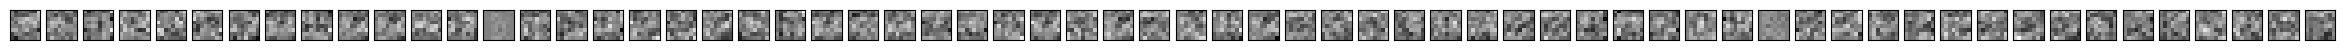

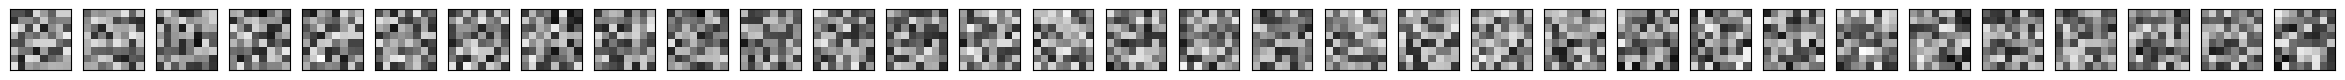

In [11]:
#Visualising hidden layer weights
import math
for i, layer in enumerate(hidden_layers):
    fig, axes = plt.subplots(1, layer, figsize=(30, 3))
    vmin, vmax = mlp.coefs_[i].min(), mlp.coefs_[i].max()
    for coef, ax in zip(mlp.coefs_[i].T, axes.ravel()):
        #display square subset
        mat_side = math.floor(math.sqrt(len(coef)))
        #For visualising only showing the largest square matrix the weights represent
        ax.matshow(coef[:mat_side*mat_side].reshape(mat_side, mat_side), cmap=plt.cm.gray, vmin=vmin, vmax=vmax)
        ax.set_xticks(())
        ax.set_yticks(())
    
plt.show()

# Task: Test score vs max iterations

In [ ]:
#Can you try the same MLP with different max_iterations up to 1000? What is the test score mlp.score(X_test, y_test)?
#Try to plot this

# Task: Test score vs architecture

In [ ]:
#For this task set the maximum iterations to be 1000.
#Is there a 'best' architecture? 
#What about wider networks (62) or (128)?
#What about deeper networks (64,64) or (64,32) or (32,32,32)?
#Can you check the test score for different architectures?


# Probabilities of Detections

In [ ]:
def plot_detection_probabilities(entry):
    probabilities = mlp.predict_proba([entry])[0]
    # print(np.sum(probabilities)) #What do you think this should be? 
    plt.bar(np.arange(10), probabilities, color='k')
    plt.xticks(np.arange(10))
    plt.ylabel("probability")
    plt.xlabel("digit labels")
    plt.show()


In [ ]:
plot_detection_probabilities(X_test[42])
print_heatmap(X_test[42])

# Task: High confidence vs low confidence classifications

In [ ]:
#Try different entries from the test set to see if you can find a low confidence example
#What would such an example look like in the probability distribution plot?